<a href="https://colab.research.google.com/github/plaban1981/Feature_Selection/blob/master/Basic_filter_methods_%2B_LASSO_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic filter methods + LASSO pipeline

In [0]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

### load the Santander customer satisfaction dataset from Kaggle

In [2]:
from google.colab import files
files.upload()

Saving Santander_train.csv to Santander_train.csv


In [4]:
data = pd.read_csv('Santander_train.csv')
data.shape

(76020, 371)

## separate dataset into train and test

In [5]:

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['TARGET'], axis=1),
    data['TARGET'],
    test_size=0.3,
    random_state=0)
 
X_train.shape, X_test.shape

((53214, 370), (22806, 370))

#### keep a copy of the dataset with all the variables to measure the performance of machine learning models at the end of the notebook


In [0]:
X_train_original = X_train.copy()
X_test_original = X_test.copy()

##Remove constant features

In [7]:
constant_features = [feat for feat in X_train.columns if X_train[feat].std() == 0]
 
X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)
 
X_train.shape, X_test.shape

((53214, 332), (22806, 332))

##Remove quasi-constant features

In [8]:
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately
 
sel.fit(X_train)  # fit finds the features with low variance
 
sum(sel.get_support()) # how many not quasi-constant?

268

In [0]:
features_to_keep = X_train.columns[sel.get_support()]

##Remove Quasi Constat features 

In [10]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
 
X_train.shape, X_test.shape

((53214, 268), (22806, 268))

#### sklearn transformations lead to numpy arrays here I transform the arrays back to dataframes please be mindful of getting the columns assigned correctly

In [0]:
X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep
 
X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

##Remove duplicated features

In [12]:
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)
 
    col_1 = X_train.columns[i]
 
    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260


16

In [13]:
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)
 
X_train.shape, X_test.shape

((53214, 252), (22806, 252))

In [0]:
# Keep a copy of the dataset except constant and duplicated variables
# to measure the performance of machine learning models
# at the end of the notebook
 
X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

##Remove correlated features

In [0]:
# Create correlation matrix
df_corr = X_train.corr().abs()

In [18]:
# Select upper triangle of correlation matrix
import numpy as np
upper = df_corr.where(np.triu(np.ones(df_corr.shape),k=1).astype(np.bool))
upper

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13,ind_var14_0,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var25_0,ind_var30,...,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,NaN,0.002694,0.001429,0.004771,0.003904,0.001377,0.004445,0.004665,0.007750,0.006784,0.003038,0.005463,0.002843,0.001107,0.003965,0.003121,0.001608,0.004300,0.002635,0.008110,0.000919,0.001349,0.006420,0.001694,0.000372,0.006295,0.007615,0.000129,0.001859,0.001979,0.003868,0.000180,0.002131,0.006357,0.008895,0.001309,0.000252,0.000122,0.001569,0.003460,...,0.004687,0.002832,0.005645,0.004079,0.001265,0.004102,0.000570,0.000034,0.000345,0.004028,0.006703,0.003079,0.003152,0.004016,0.000811,0.002639,0.002627,0.006608,0.002597,0.008487,0.009177,0.005418,0.005418,0.006205,0.000611,0.009187,0.008606,0.006619,0.000187,0.007134,0.009078,0.007105,0.007444,0.003968,0.004385,0.003306,0.000275,0.000197,0.001404,0.002467
var3,NaN,NaN,0.003769,0.001790,0.005309,0.006322,0.001540,0.001697,0.000536,0.000632,0.001301,0.005203,0.006247,0.002917,0.004218,0.004627,0.002927,0.004225,0.004697,0.000465,0.000285,0.008462,0.037967,0.007395,0.006882,0.010793,0.008750,0.009424,0.008503,0.008339,0.004066,0.009278,0.006257,0.008434,0.007987,0.006577,0.006379,0.006738,0.006223,0.046814,...,0.008330,0.004412,0.004415,0.003101,0.004053,0.001747,0.000896,0.002322,0.002333,0.004559,0.002709,0.005214,0.005250,0.005567,0.003161,0.006123,0.006077,0.002382,0.001406,0.002556,0.002533,0.000173,0.000173,0.000767,0.000410,0.000866,0.000952,0.000203,0.000174,0.000233,0.000280,0.000738,0.000553,0.000732,0.000770,0.000642,0.000465,0.000769,0.000805,0.000140
var15,NaN,NaN,NaN,0.042432,0.095696,0.101386,0.042572,0.045842,0.008120,0.009172,0.033432,0.089442,0.094711,0.086844,0.093605,0.106290,0.086632,0.093492,0.108378,0.014031,0.103099,0.116352,0.100383,0.114480,0.102165,0.267580,0.222715,0.298271,0.245620,0.242714,0.178713,0.296400,0.154429,0.256206,0.247284,0.081814,0.095670,0.098136,0.080183,0.032738,...,0.229652,0.182474,0.165709,0.125532,0.171304,0.045925,0.026300,0.056655,0.060254,0.176145,0.114159,0.195514,0.197795,0.190344,0.108053,0.210769,0.208317,0.120251,0.070837,0.125647,0.123679,0.003567,0.003567,0.047659,0.025522,0.046276,0.053101,0.007300,0.003421,0.012665,0.013782,0.027528,0.018402,0.028426,0.029238,0.031925,0.019212,0.034742,0.034995,0.004416
imp_ent_var16_ult1,NaN,NaN,NaN,NaN,0.042590,0.035779,0.013211,0.012599,0.000342,0.000678,0.014719,0.041491,0.034476,0.026414,0.022779,0.039745,0.026165,0.022668,0.040828,0.000205,0.019241,0.000971,0.020472,0.003398,0.004982,0.038615,0.0

In [19]:
# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

['imp_op_var39_comer_ult3',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult3',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'ind_var8_0',
 'ind_var8',
 'ind_var12',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13',
 'ind_var24_0',
 'ind_var24',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var25_0',
 'ind_var30',
 'ind_var37_0',
 'ind_var40_0',
 'ind_var41_0',
 'num_var1_0',
 'num_var5_0',
 'num_var5',
 'num_var8_0',
 'num_var8',
 'num_var12_0',
 'num_var12',
 'num_var13_0',
 'num_var13_corto_0',
 'num_var13_corto',
 'num_var13_largo_0',
 'num_var13_largo',
 'num_var13',
 'num_var14_0',
 'num_var17',
 'num_var20',
 'num_var24_0',
 'num_var24',
 'num_var26_0',
 'num_var25_0',
 'num_op_var40_ult3',
 'num_op_var41_ult3',
 'num_op_var39_hace2',
 'num_op_var39_hace3',
 'num_op_var39_ult1',
 'num_op_var39_ult3',
 'num_var30',
 'num_var31_0',
 'num_v

In [20]:
len(to_drop)

133

## removed correlated  features

In [21]:

X_train.drop(labels=to_drop, axis=1, inplace=True)
X_test.drop(labels=to_drop, axis=1, inplace=True)
 
X_train.shape, X_test.shape

((53214, 119), (22806, 119))

## keep a copy of the dataset at  this stage

In [0]:

X_train_corr = X_train.copy()
X_test_corr = X_test.copy()


## Remove features using univariate roc_auc
- find important features using univariate roc-auc
- loop to build a tree, make predictions and get the roc-auc for each feature of the train set

In [0]:
roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

In [24]:
df_roc = pd.DataFrame({'Features':X_train.columns,'ROC':roc_values})
df_roc.head()

,Features,ROC
0,ID,0.509104
1,var3,0.503730
2,var15,0.697065
3,imp_ent_var16_ult1,0.498143
4,imp_op_var39_comer_ult1,0.506249


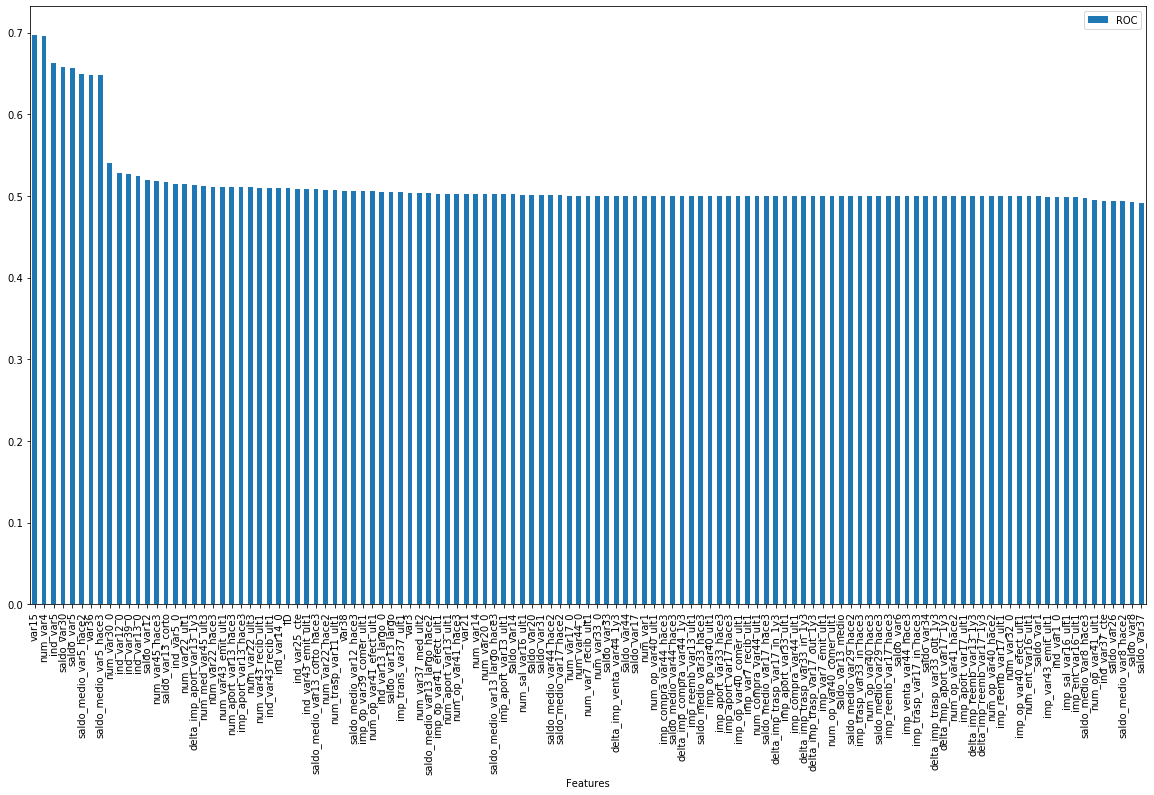

In [25]:
df_roc.sort_values(by='ROC',ascending=False).set_index('Features').plot.bar(figsize=(20, 11))
plt.show()

In [26]:
selected_feat = df_roc[df_roc['ROC']>0.5]
len(selected_feat), X_train.shape[1]

(90, 119)

#### Note
- by removing features with univariate roc_auc == 0.50, we remove another 30 features
- here the selected features which have a ROC > 0.50 is 90
total number of features is 119

## Remove features using Lasso

In [27]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

## fit a lasso and select features, make sure to select l1

In [29]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

# remove features with zero coefficient from dataset and parse again as dataframe (output of sklearn is numpy array)

In [0]:
X_train_lasso = pd.DataFrame(sel_.transform(X_train))
X_test_lasso = pd.DataFrame(sel_.transform(X_test))

In [31]:
X_train.columns[(sel_.get_support())]

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var40_comer_ult1', 'imp_op_var40_efect_ult1',
       'imp_op_var40_ult1', 'imp_op_var41_efect_ult1', 'ind_var1_0',
       'ind_var5_0', 'ind_var5', 'ind_var12_0', 'ind_var13_0',
       'ind_var13_largo_0', 'ind_var14_0', 'ind_var25_cte', 'ind_var37_cte',
       'ind_var39_0', 'num_var1', 'num_var4', 'num_var14', 'num_var17_0',
       'num_var20_0', 'num_op_var40_hace2', 'num_op_var40_ult1',
       'num_op_var41_hace2', 'num_op_var41_hace3', 'num_op_var41_ult1',
       'num_var30_0', 'num_var32_0', 'num_var33_0', 'num_var37_med_ult2',
       'num_var44_0', 'saldo_var1', 'saldo_var5', 'saldo_var6', 'saldo_var8',
       'saldo_var12', 'saldo_var13_largo', 'saldo_var13_medio', 'saldo_var14',
       'saldo_var26', 'saldo_var30', 'saldo_var31', 'saldo_var34',
       'saldo_var37', 'saldo_var44', 'var36', 'delta_imp_aport_var13_1y3',
       'delta_imp_aport_var17_1y3', 'delta_imp_compra_var44_1y3',
 

##Add the column name for features selected by Lasso Regularization whose support score do not divulge to zero

In [0]:
X_train_lasso.columns = X_train.columns[(sel_.get_support())]
X_test_lasso.columns = X_train.columns[(sel_.get_support())]

In [33]:
X_train_lasso.shape, X_test_lasso.shape

((53214, 91), (22806, 91))

##Compare the performance in machine learning algorithms for different filtered features

In [0]:
def run_randomForests(X_train, X_test, y_train, y_test):
  rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
  rf.fit(X_train,y_train)
  print('Train set')
  pred = rf.predict_proba(X_train)
  print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
  print('Test set')
  pred = rf.predict_proba(X_test)
  print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

##Original

In [35]:
run_randomForests(X_train_original.drop(labels=['ID'], axis=1),
                  X_test_original.drop(labels=['ID'], axis=1),
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8012314741948454
Test set
Random Forests roc-auc: 0.7900499757912425


##filter methods - basic

In [36]:
run_randomForests(X_train_basic_filter.drop(labels=['ID'], axis=1),
                  X_test_basic_filter.drop(labels=['ID'], axis=1),
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8016577097093865
Test set
Random Forests roc-auc: 0.791033019265853


##filter methods - correlation

In [37]:
run_randomForests(X_train_corr.drop(labels=['ID'], axis=1),
                  X_test_corr.drop(labels=['ID'], axis=1),
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8073914001626228
Test set
Random Forests roc-auc: 0.7937667747098247


## filter methods - univariate roc-auc

In [38]:
run_randomForests(X_train[selected_feat['Features']],
                  X_test_corr[selected_feat['Features']],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8105671870819526
Test set
Random Forests roc-auc: 0.7985492537265694


## embedded methods - Lasso

In [39]:
run_randomForests(X_train_lasso.drop(labels=['ID'], axis=1),
                  X_test_lasso.drop(labels=['ID'], axis=1),
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8097707624287591
Test set
Random Forests roc-auc: 0.7981117319117003


#### Selecting features using Lasso or univariate feature selection using the roc-auc lead to very similar results:

- univariate: 0.7985

- Lasso: 0.7981


The difference is in the 4th decimal, which is likely within the error (remember that all models have an error, which you could estimate doing cross-validation).

Therefore, for this dataset, any of the 2 approaches would lead to a similar result in terms of performance and final number of features used (90 and 91 respectively).